In [ ]:
# Wir importieren alle Bibliotheken, die wir benötigen ...
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# ... und noch für das Netzwerk
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/hackerschool/module_2'

Mounted at /content/drive


In [ ]:
# Das sind die sechs Klassen bzw. Label dir wir später trainieren wollen
classes = ["Billie Eilish", "Queen Elisabeth", "Kamala Harris", "Michelle Obama", "Kristen Stewart", "Taylor Swift"]

# Wir definieren die Pfade für Training, Validierung und Testen
training_dir = os.path.join(base_dir,"images/train/")
validation_dir = os.path.join(base_dir,"images/validate/")
test_dir = os.path.join(base_dir,"images/test/")

# Die Bildgröße ist 256 breit x 256 hoch
img_size = (256,256)

# Die Batch-Size gibt später an, wieviele Bilder auf einmal verarbeitet werden sollen
batch_size = 1


In [ ]:
# Für jeden Satz an Daten brauchen wir einen neuen ImageDatenGenerator

train_data_generator = ImageDataGenerator(rescale= 1. / 255.)

validate_data_generator = ImageDataGenerator(rescale= 1. / 255.)

test_data_generator = ImageDataGenerator(rescale= 1. / 255.)


In [ ]:
# Für jeden Daten-Generator legen wir fest, 
#   - in welchem Datei-Pfad die Bilder liegen
#   - welche Zielgröße die Bilder haben
#   - das wir die Daten in RGB haben wollen
#   - das die Daten nicht immer in der gleichen Reihenfolge gelesen werden sollen
#   - wie viele Daten auf einmal geladen werden sollen
#   - Wie die Klassen strukturiert werden sollen

train_generator = train_data_generator.flow_from_directory(
    training_dir, 
    target_size=(256,256),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = validate_data_generator.flow_from_directory(
    validation_dir, 
    target_size=(256,256),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
    class_mode="categorical")

test_generator = test_data_generator.flow_from_directory(
    test_dir, 
    target_size=(256,256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical")

Found 420 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


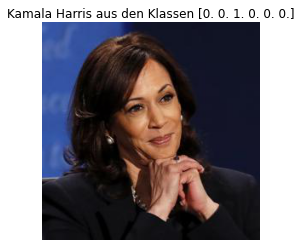

In [ ]:
item = train_generator.__getitem__(1) 
name = classes[np.argmax(item[1])] 
plt.imshow(np.squeeze(item[0]))
plt.title(f"{name} aus den Klassen {np.squeeze(item[1])}")
plt.axis('off')
plt.show()

In [ ]:
# Wir müssen ein paar Metaparameter für das Netzwerk definieren
num_classes = 6 # die Anzahl der Klassen die wir trainieren wollen
epochs = 5 # die Anzahl der Durchläufe des Models

In [ ]:
# Wir legen ein neues Model an
model = Sequential(name='Face-Recognition')

# und fügen dem Model Layer hinzu
# beim ersten Layer müssen wir darauf achten, die input_shape zu definieren. 
# Das ist die Bildgröße und die Anzahl der Farbkanäle RGB --> (256, 256 ,3)
model.add(Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(tf.keras.layers.SpatialDropout2D(0.1))
model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(tf.keras.layers.SpatialDropout2D(0.1))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(tf.keras.layers.SpatialDropout2D(0.1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(num_classes))

# So sieht die Struktur unseres Netzwerks aus
model.summary()

Model: "Face-Recognition"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 256, 256, 8)       224       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 128, 128, 8)       0         
_________________________________________________________________
spatial_dropout2d_12 (Spatia (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
spatial_dropout2d_13 (Spatia (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 32)   

In [ ]:
# Anschließend müssen wir das Netzwerk kompilieren mit:
# 1. Optimieren --> für das Korrigieren im Fehlerfall
# 2. Loss-Funktion --> zum Vergleich zwischen Vorhersage und tatsächlichem Label
# 3. Metrik --> zum Speichern des Verlaufs des Trainings
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# über model.fit starten wir das Training. Hier geben wir die Trainings- und Validierungsdaten mit,
# sowie die Anzahl der Durchläufe
history = model.fit(
    train_generator,  # Trainingsdaten
    validation_data=validation_generator, # Validierungsdaten
    epochs=epochs # Durchläufe
)

Epoch 1/5
420/420 [==============================] - 3s 7ms/step - loss: 8.1742 - accuracy: 0.1762 - val_loss: 8.0591 - val_accuracy: 0.1833
Epoch 2/5
420/420 [==============================] - 3s 7ms/step - loss: 8.0591 - accuracy: 0.1714 - val_loss: 8.0591 - val_accuracy: 0.1833
Epoch 3/5
420/420 [==============================] - 3s 7ms/step - loss: 8.1742 - accuracy: 0.1762 - val_loss: 8.0591 - val_accuracy: 0.1833
Epoch 4/5
420/420 [==============================] - 3s 7ms/step - loss: 8.2126 - accuracy: 0.1786 - val_loss: 8.0591 - val_accuracy: 0.1833
Epoch 5/5
420/420 [==============================] - 3s 7ms/step - loss: 8.0974 - accuracy: 0.1714 - val_loss: 8.0591 - val_accuracy: 0.1833


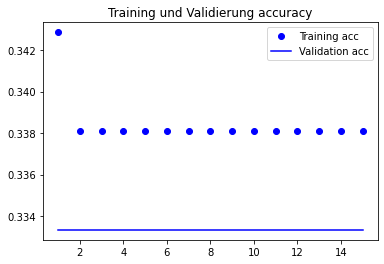

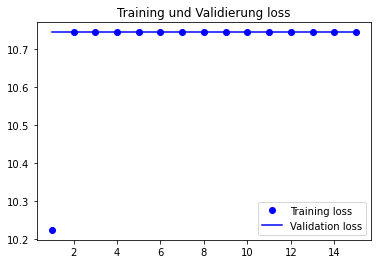

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training und Validierung accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training und Validierung loss')
plt.legend()
plt.show()

In [ ]:
# Speichert das Model ab, wenn ihr das Ergebnis gut findet
save_where = 'model.h5'
model.save_weights(save_where)